In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [15]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles( mean=None,
                                             cov=0.1,
                                             n_samples= N,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles

In [17]:
Y


array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [18]:
Y = Y[:,np.newaxis]

In [13]:
Y.shape

(1000, 1)

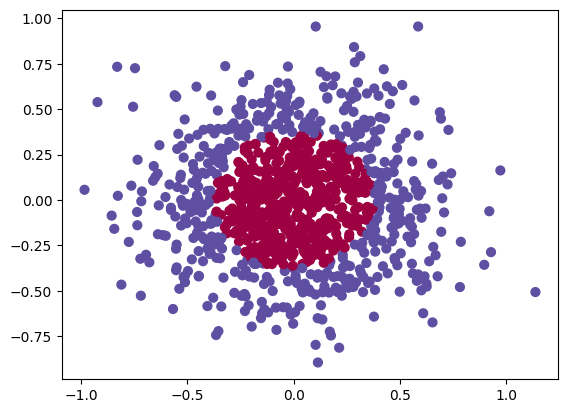

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40,cmap=plt.cm.Spectral)

Funciones de activación

In [20]:
def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    return np.maximum(0,x)

In [40]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/((np.exp(-x) + 1) ** 2)
    return 1/(1+np.exp(-x))

Función de perdida

In [21]:
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    return np.mean((y_hat - y) ** 2)

In [22]:
np.random.rand(10,3)

array([[0.80771299, 0.97829898, 0.50876221],
       [0.64098673, 0.958066  , 0.89249311],
       [0.86931305, 0.81142333, 0.00865535],
       [0.14072386, 0.87364104, 0.42208176],
       [0.72987698, 0.6903411 , 0.46424392],
       [0.45093183, 0.92455445, 0.34061631],
       [0.34825974, 0.71332381, 0.13210915],
       [0.5535256 , 0.22943721, 0.39397287],
       [0.56841765, 0.05792691, 0.79665352],
       [0.08358515, 0.96957213, 0.5571755 ]])

In [33]:
def initialiaze_parameters_deep(layers_dim):
    paramaters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        paramaters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
        paramaters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
    return paramaters

In [34]:
layers_dim = [2,4,8,1]
params = initialiaze_parameters_deep(layers_dim)


In [35]:
params['W1'].shape

(2, 4)

In [26]:
X.shape

(1000, 2)

Producto punto

In [36]:
np.matmul(X, params['W1']).shape

(1000, 4)

También se puede expresar de esta manera:

In [37]:
X@params['W1']

array([[-1.15321776e-01,  3.67198522e-02,  1.31105527e-01,
         1.11230419e-01],
       [ 3.33905061e-01, -9.05268259e-02,  1.38914467e-01,
        -5.00933699e-01],
       [-1.99742192e-02,  3.42550597e-04, -1.74864685e-01,
         8.74225995e-02],
       ...,
       [-1.31512877e-02, -2.46092482e-03, -2.03338204e-01,
         8.79884259e-02],
       [-2.96342573e-01,  8.40975495e-02, -1.55788683e-05,
         4.02056117e-01],
       [-4.08789014e-01,  1.20429394e-01,  1.45141644e-01,
         5.04538103e-01]])

Forward o Hacia adelante

In [41]:
def train(x_data,lr, params, training = True):
    params['A0'] = x_data
    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
    #Backpropagation
    #Como la dimension params['dZ3'] es (1000,1) y la params['A2'] es (8,1000) hay que hallar la traspuesta
        params['dZ3'] = mse(Y,output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])
    #Gradient Descent (Descenso del Gradiente)
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - np.mean(params['dW3'], axis=0, keepdims=True) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - np.mean(params['dW2'], axis=0, keepdims=True) * lr

        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - np.mean(params['dW1'], axis=0, keepdims=True) * lr

    return output


In [49]:
layers_dim = [2,4,8,1]
params = initialiaze_parameters_deep(layers_dim)
errors = []

for _ in range(60000):
    output = train(X, 0.0001, params)

    if _ % 50 == 0:
        print(mse(Y, output))
        errors.append(mse(Y, output))

0.3213055637256324
0.28461323595994104
0.2685226211050093
0.25924699724980677
0.25301241933648405
0.24909232151866112
0.24678649738506653
0.24523589882947128
0.24410356999501662
0.24319785646504663
0.24241136157177523
0.2416987424188419
0.24101234063575439
0.24034884200788303
0.2396785761268832
0.23898658576547904
0.23826953430831735
0.23752053087429453
0.23673927272261702
0.2359194440345171
0.235062345571296
0.23416969460092327
0.23323896134247632
0.23226524923422023
0.2312359287551652
0.2301446168204037
0.22898582941396853
0.22775988171895212
0.22648433880909796
0.22516124605793342
0.22378999066825112
0.22238894458936317
0.22093174578449207
0.21942691467581638
0.2178689362591365
0.21630685380223252
0.21474543547398048
0.21315006779332668
0.21159634848021794
0.21007640533732883
0.2085781292703555
0.2070816515832308
0.2056020191627152
0.20414233203459398
0.20270615708923492
0.20132288573567736
0.19995358544337904
0.1986245892919127
0.19731061888674872
0.1959590510243866
0.1946053000309

In [44]:
errors

[0.26522870416534694,
 0.2613384160272667,
 0.25832344210594377,
 0.25599288819959154,
 0.2541931257943617,
 0.25280285211698816,
 0.251724601828215,
 0.2508831037149884,
 0.25022150828583456,
 0.2496980919575492,
 0.24928035728859532,
 0.24894085981209316,
 0.24866072633239958,
 0.24842472694411655,
 0.24822280307502326,
 0.24804823750119134,
 0.24789512031440922,
 0.24776103453348922,
 0.24764058164523994,
 0.2475298873274898,
 0.24742815101905435,
 0.24733436558767072,
 0.2472458163490723,
 0.24716089819492829,
 0.24707957096611893,
 0.24700067245365565,
 0.24692519095247145,
 0.24685215012315445,
 0.24678050958448564,
 0.246710674478284,
 0.24664291250808398,
 0.24657778737047267,
 0.24651357824910008,
 0.24644993061777784,
 0.24638704100560488,
 0.24632496670436155,
 0.246264028485782,
 0.2462043831917527,
 0.24614563200137338,
 0.24608727698033062,
 0.2460298138052865,
 0.24597293555929597,
 0.24591643188940607,
 0.24586043761551588,
 0.2458048699063396,
 0.24574999000348993,
 0.

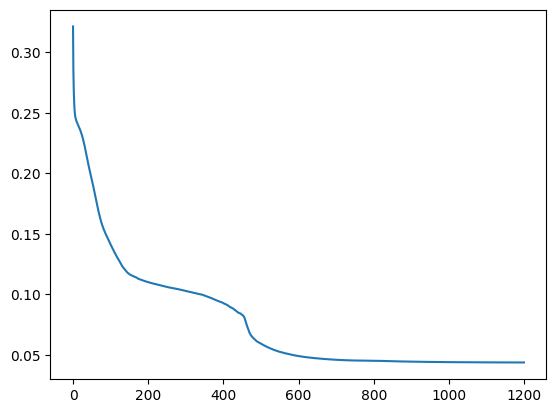

In [50]:
plt.plot(errors)

In [51]:
data_test = (np.random.rand(1000,2) * 2 ) - 1

In [53]:
y = train(data_test, 0.0001, params, training= False)


In [54]:
y = np.where(y >= 0.5, 1, 0 )

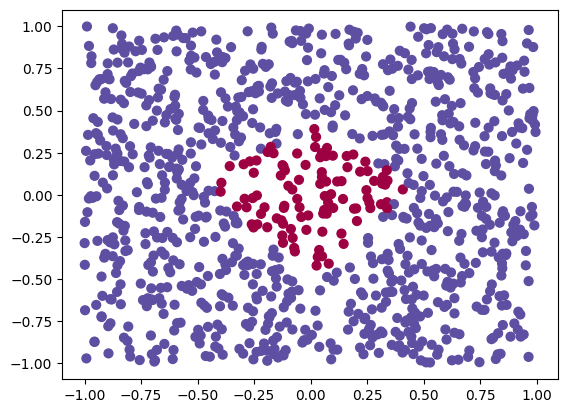

In [55]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40,cmap=plt.cm.Spectral)